In [1]:
import pandas as pd
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 1. Caminho "raiz" onde estão as pastas de cada linguagem
caminho_base_resultados = r"C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados"

# 2. Lista das pastas (linguagens) para incluir.
pastas_linguagens = ['C', 'C++','Python']

# 3. Lista para armazenar todos os DataFrames que encontrarmos
lista_dataframes = []

print(f"Iniciando varredura dinâmica em: {caminho_base_resultados}\n")

# 4. Loop por cada pasta de linguagem
for linguagem in pastas_linguagens:
    # 5. Cria o caminho completo para a pasta da linguagem 
    caminho_pasta_lang = os.path.join(caminho_base_resultados, linguagem)
    
    # 6. Cria o padrão de busca para encontrar TODOS os arquivos .csv
    padrao_busca = os.path.join(caminho_pasta_lang, "*.csv")
    
    print(f"--- Procurando arquivos em: {caminho_pasta_lang} ---")
    
    # 7. Usa 'glob' para encontrar todos os arquivos .csv no caminho
    arquivos_csv_encontrados = glob.glob(padrao_busca)
    
    if not arquivos_csv_encontrados:
        print("  -> Nenhum arquivo .csv encontrado nesta pasta.")
        continue

    # 8. Loop por cada arquivo .csv que foi encontrado
    for caminho_arquivo in arquivos_csv_encontrados:
        # Pega apenas o nome do arquivo (ex: 'resultados_heap_sort_c.csv')
        nome_arquivo = os.path.basename(caminho_arquivo)
        
        try:
            # Lê o arquivo usando o separador ';'
            df_temp = pd.read_csv(caminho_arquivo, sep=';')
            
            # Adiciona o DataFrame lido à nossa lista principal
            lista_dataframes.append(df_temp)
            
            print(f"  -> Arquivo '{nome_arquivo}' carregado com sucesso.")
            
        except Exception as e:
            print(f"  -> ERRO ao ler o arquivo {nome_arquivo}: {e}")

# 9. Unificar todos os DataFrames da lista em um só
if lista_dataframes:
    # 'pd.concat' une todos os DataFrames da lista
    df_completo = pd.concat(lista_dataframes, ignore_index=True)
    
    print("\n-------------------------------------------------")
    print("Sucesso! Todos os arquivos foram encontrados e unidos.")
    print("-------------------------------------------------")
    
    
    # Exibe as informações de verificação
    print("\nInformações do DataFrame:")
    df_completo.info()
    
    print("\nContagem por Linguagem:")
    print(df_completo['Linguagem'].value_counts())
    
else:
    print("\nNenhum arquivo CSV foi carregado. Verifique os caminhos e as pastas.")

Iniciando varredura dinâmica em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados

--- Procurando arquivos em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados\C ---
  -> Arquivo 'resultados_heap_sort_c.csv' carregado com sucesso.
  -> Arquivo 'resultados_merge_sort_c.csv' carregado com sucesso.
  -> Arquivo 'resultados_quick_sort_c.csv' carregado com sucesso.
--- Procurando arquivos em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados\C++ ---
  -> Arquivo 'resultados_heap_sort_c++.csv' carregado com sucesso.
  -> Arquivo 'resultados_merge_sort_c++.csv' carregado com sucesso.
  -> Arquivo 'resultados_quick_sort_c++.csv' carregado com sucesso.
--- Procurando arquivos em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados\Python ---
  -> Nenhum arquivo .csv encontrado nesta pasta.

-------------------------------------------------
Sucesso! Todos os arquivos foram encontrados e unidos.
-------------------------------------------------


In [3]:
display(df_completo)

,Linguagem,Algoritmo,Tamanho,Tempo,Repeticao
0,C,HeapSort,100,0.000011,1
1,C,HeapSort,100,0.000009,2
2,C,HeapSort,100,0.000014,3
3,C,HeapSort,100,0.000016,4
4,C,HeapSort,100,0.000018,5
...,...,...,...,...,...
2995,C++,QuickSort,1000000,0.276577,96
2996,C++,QuickSort,1000000,0.272614,97
2997,C++,QuickSort,1000000,0.276003,98
2998,C++,QuickSort,1000000,0.276054,99


In [4]:
# Importar bibliotecas de visualização

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")

# Agrupar os dados e calcular as estatísticas
# Para cada (Linguagem, Algoritmo, Tamanho), calculamos a média, mediana e desvio padrão do Tempo
df_agregado = df_completo.groupby(['Linguagem', 'Algoritmo', 'Tamanho'])['Tempo'].agg(['mean', 'median', 'std']).reset_index()

# Renomear colunas para facilitar (opcional, mas recomendado)
df_agregado.rename(columns={'mean': 'Tempo_Medio', 'median': 'Tempo_Mediano', 'std': 'Desvio_Padrao'}, inplace=True)

print("DataFrame agregado com as estatísticas:")
display(df_agregado)

DataFrame agregado com as estatísticas:


,Linguagem,Algoritmo,Tamanho,Tempo_Medio,Tempo_Mediano,Desvio_Padrao
0,C,HeapSort,100,0.000015,0.000012,0.000015
1,C,HeapSort,1000,0.000192,0.000171,0.000078
2,C,HeapSort,10000,0.001979,0.001827,0.000501
3,C,HeapSort,100000,0.020344,0.019565,0.002690
4,C,HeapSort,1000000,0.265231,0.264344,0.009786
5,C,MergeSort,100,0.000028,0.000026,0.000010
6,C,MergeSort,1000,0.000234,0.000226,0.000068
7,C,MergeSort,10000,0.002525,0.002288,0.000783
8,C,MergeSort,100000,0.021402,0.020722,0.002696
9,C,MergeSort,1000000,0.221267,0.220224,0.011382


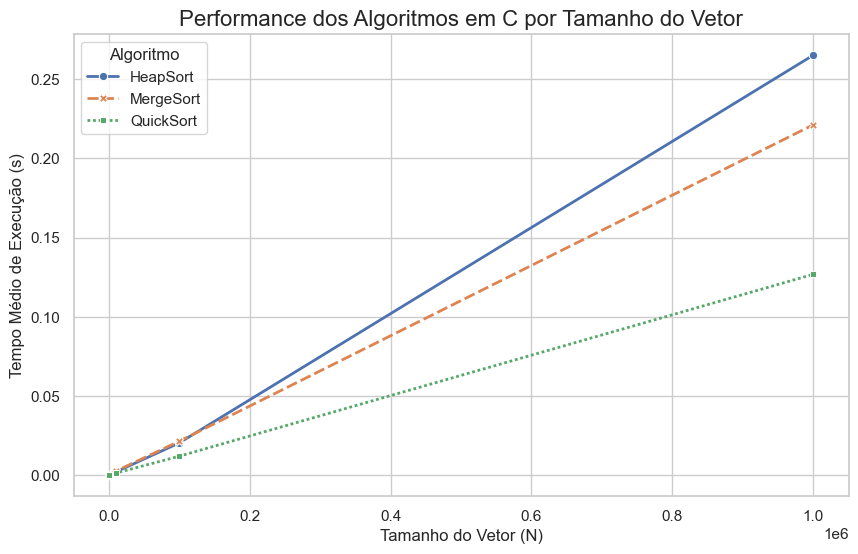

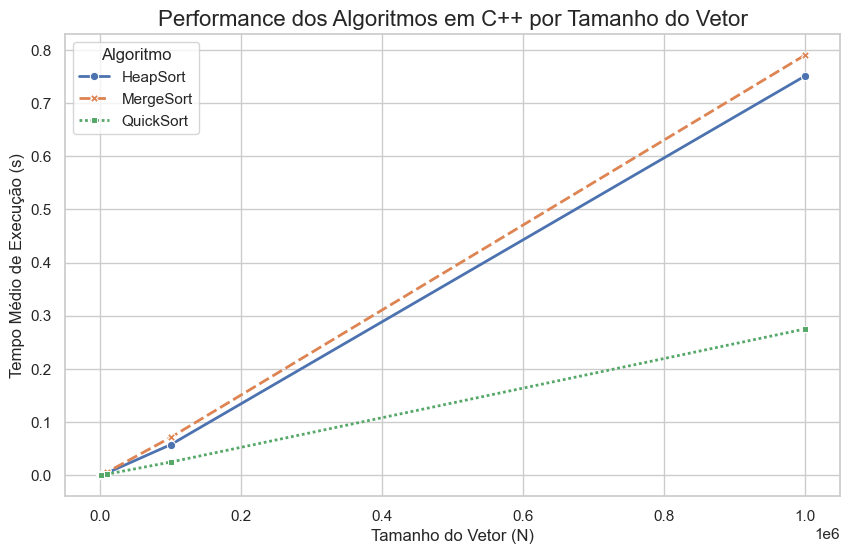

In [5]:
# 1. Gráfico de Linha comparando os ALGORITMOS em C
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_agregado[df_agregado['Linguagem'] == 'C'], 
    x='Tamanho', 
    y='Tempo_Medio', 
    hue='Algoritmo', # 'hue' cria uma linha de cor diferente para cada algoritmo
    style='Algoritmo', # 'style' usa marcadores diferentes
    markers=True,
    lw=2
)
plt.title('Performance dos Algoritmos em C por Tamanho do Vetor', fontsize=16)
plt.xlabel('Tamanho do Vetor (N)', fontsize=12)
plt.ylabel('Tempo Médio de Execução (s)', fontsize=12)
plt.legend(title='Algoritmo')
plt.show()

# 2. Gráfico de Linha comparando os ALGORITMOS em C++
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_agregado[df_agregado['Linguagem'] == 'C++'], 
    x='Tamanho', 
    y='Tempo_Medio', 
    hue='Algoritmo',
    style='Algoritmo',
    markers=True,
    lw=2
)
plt.title('Performance dos Algoritmos em C++ por Tamanho do Vetor', fontsize=16)
plt.xlabel('Tamanho do Vetor (N)', fontsize=12)
plt.ylabel('Tempo Médio de Execução (s)', fontsize=12)
plt.legend(title='Algoritmo')
plt.show()

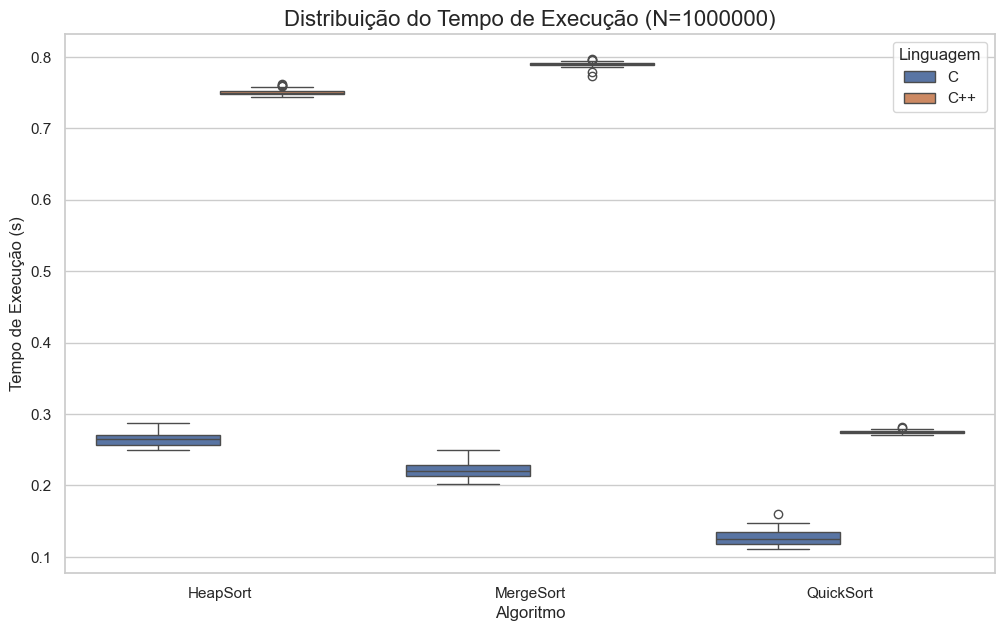

In [6]:
# Pegar o maior tamanho testado (ex: 1000000)
maior_tamanho = df_completo['Tamanho'].max()

# Filtrar o DataFrame original para conter apenas os dados do maior tamanho
df_maior_tamanho = df_completo[df_completo['Tamanho'] == maior_tamanho]

# 3. Box Plot comparando a distribuição do tempo
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_maior_tamanho,
    x='Algoritmo',
    y='Tempo',
    hue='Linguagem' # 'hue' cria caixas lado a lado para C e C++
)
plt.title(f'Distribuição do Tempo de Execução (N={maior_tamanho})', fontsize=16)
plt.xlabel('Algoritmo', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.show()

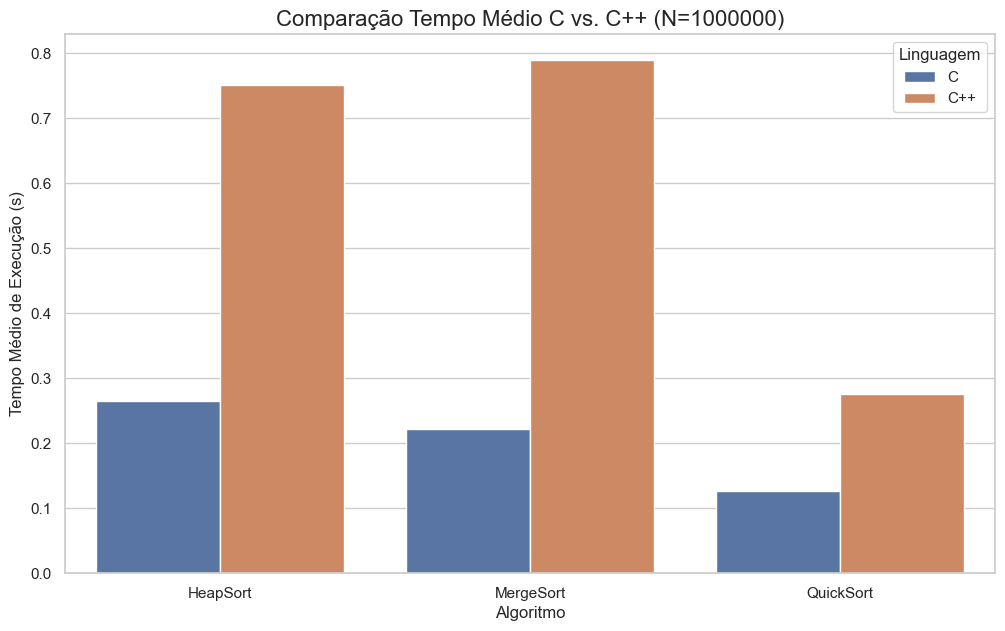

In [7]:
# Usamos os dados agregados (df_agregado) do maior tamanho
df_agregado_maior_tamanho = df_agregado[df_agregado['Tamanho'] == maior_tamanho]

# 4. Gráfico de Barras C vs C++
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_agregado_maior_tamanho,
    x='Algoritmo',
    y='Tempo_Medio',
    hue='Linguagem',
    palette='deep' # Define um esquema de cores
)
plt.title(f'Comparação Tempo Médio C vs. C++ (N={maior_tamanho})', fontsize=16)
plt.xlabel('Algoritmo', fontsize=12)
plt.ylabel('Tempo Médio de Execução (s)', fontsize=12)
plt.show()